In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

%matplotlib inline

2024-12-09 15:53:55.842811: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 15:53:55.859253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733759635.880767     658 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733759635.886798     658 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 15:53:55.906588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

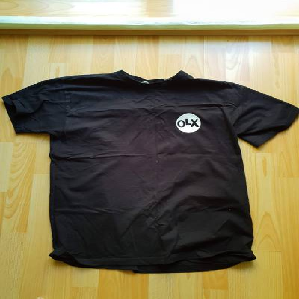

In [2]:
path = './clothing-dataset/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
img

In [3]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FF91C5C8770>


In [4]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [5]:
x.shape

(299, 299, 3)

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
 
# weights = "imagenet" means we want to use pre-trained network that was trained on imagenet
 
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

I0000 00:00:1733759643.610184     658 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [7]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [8]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [9]:
pred = model.predict(X)

I0000 00:00:1733759646.996312     718 service.cc:148] XLA service 0x7ff8640496c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733759646.996343     718 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-09 15:54:07.031976: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733759647.351597     718 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-09 15:54:08.480540: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733759649.310499     718 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
pred.shape

(1, 1000)

In [11]:
pred

array([[3.23711720e-04, 1.57383620e-04, 2.13492909e-04, 1.52370310e-04,
        2.47625867e-04, 3.05035588e-04, 3.20591877e-04, 1.47499100e-04,
        2.03621574e-04, 1.49272222e-04, 1.95662637e-04, 2.10137106e-04,
        7.59263276e-05, 1.13972063e-04, 1.62683325e-04, 2.04638360e-04,
        1.97415720e-04, 1.44288555e-04, 1.40217307e-04, 1.73685738e-04,
        7.46689388e-04, 2.56966305e-04, 2.66808522e-04, 2.96513696e-04,
        3.73601477e-04, 2.77403888e-04, 2.16570566e-04, 2.27269833e-04,
        3.80812475e-04, 1.72165717e-04, 3.05400608e-04, 1.96431269e-04,
        3.92114656e-04, 4.78070811e-04, 2.91750941e-04, 3.25692934e-04,
        1.47395040e-04, 1.62361859e-04, 2.12710496e-04, 1.34028203e-04,
        2.40070076e-04, 6.75210962e-04, 2.54943094e-04, 1.44478574e-04,
        4.12820635e-04, 2.04408192e-04, 3.02957807e-04, 1.49339437e-04,
        1.99653470e-04, 2.27005541e-04, 2.93729041e-04, 2.27444601e-04,
        6.37643272e-04, 7.82614748e-04, 2.49556848e-04, 4.052703

In [12]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564))]]

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
train_ds = train_gen.flow_from_directory(
    './clothing-dataset/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [14]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [15]:
!ls clothing-dataset/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [16]:
X, y = next(train_ds)

In [17]:
X

array([[[[ 0.27843142,  0.24705887,  0.17647064],
         [ 0.2941177 ,  0.26274514,  0.19215691],
         [ 0.30980396,  0.27843142,  0.20784318],
         ...,
         [ 0.6627451 ,  0.6627451 ,  0.6       ],
         [ 0.6627451 ,  0.6627451 ,  0.6       ],
         [ 0.6627451 ,  0.6627451 ,  0.6       ]],

        [[ 0.28627455,  0.254902  ,  0.18431377],
         [ 0.30980396,  0.27843142,  0.20784318],
         [ 0.3176471 ,  0.28627455,  0.21568632],
         ...,
         [ 0.6627451 ,  0.6627451 ,  0.6       ],
         [ 0.6627451 ,  0.6627451 ,  0.6       ],
         [ 0.6627451 ,  0.6627451 ,  0.6       ]],

        [[ 0.2941177 ,  0.26274514,  0.19215691],
         [ 0.30196083,  0.27058828,  0.20000005],
         [ 0.30980396,  0.27843142,  0.20784318],
         ...,
         [ 0.6627451 ,  0.6627451 ,  0.6       ],
         [ 0.6627451 ,  0.6627451 ,  0.6       ],
         [ 0.6627451 ,  0.6627451 ,  0.6       ]],

        ...,

        [[-0.08235294, -0.10588235, -0

In [18]:
X.shape

(32, 150, 150, 3)

In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = val_gen.flow_from_directory(
    './clothing-dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
 
base_model.trainable = False

In [23]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
outputs = base
model = keras.Model(inputs, outputs)
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(32, 5, 5, 2048)

In [24]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
 
pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = vectors
 
model = keras.Model(inputs, outputs)
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 2048)

In [25]:
inputs = keras.Input(shape=(150, 150, 3))
 
base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = vectors
model = keras.Model(inputs, outputs)
 
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 2048)

In [26]:
inputs = keras.Input(shape=(150, 150, 3))
 
base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)
 
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 10)

In [27]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
 
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.5794 - loss: 1.6355 - val_accuracy: 0.7390 - val_loss: 1.1520
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8244 - loss: 0.6326 - val_accuracy: 0.7830 - val_loss: 0.8175
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8781 - loss: 0.3513 - val_accuracy: 0.8006 - val_loss: 0.8452
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9213 - loss: 0.2190 - val_accuracy: 0.7771 - val_loss: 0.8674
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9418 - loss: 0.1649 - val_accuracy: 0.8211 - val_loss: 0.7955
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9668 - loss: 0.1017 - val_accuracy: 0.8299 - val_loss: 0.8943
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9694 - loss: 0.0898 - val_accuracy: 0.7977 - val_loss: 0.8992
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9839 - loss: 0.0573 - val_accuracy: 0.7859 - val_loss: 

In [29]:
history.history['accuracy']

[0.6616688370704651,
 0.8269230723381042,
 0.8784224390983582,
 0.9097131490707397,
 0.941329836845398,
 0.9615384340286255,
 0.9687092304229736,
 0.9788135886192322,
 0.9885919094085693,
 0.9768579006195068]

In [30]:
history.history['val_accuracy']

[0.7390029430389404,
 0.7829912304878235,
 0.8005865216255188,
 0.7771260738372803,
 0.8211143612861633,
 0.829912006855011,
 0.7976539731025696,
 0.7859237790107727,
 0.8181818127632141,
 0.803519070148468]

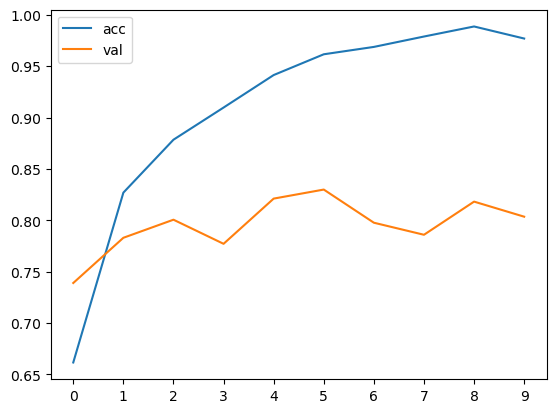

In [31]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [32]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

In [33]:
scores = {}
 
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
 
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
 
    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.2183 - loss: 2.1613 - val_accuracy: 0.5191 - val_loss: 1.5651
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5452 - loss: 1.4564 - val_accuracy: 0.6598 - val_loss: 1.2205
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6432 - loss: 1.1661 - val_accuracy: 0.6979 - val_loss: 1.0478
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6715 - loss: 1.0409 - val_accuracy: 0.7273 - val_loss: 0.9423
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7068 - loss: 0.9243 - val_accuracy: 0.7419 - val_loss: 0.8723
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7397 - loss: 0.8355 - val_accuracy: 0.7507 - val_loss: 0.8215
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7478 - loss: 0.7898 - val_accuracy: 0.7683 - val_loss: 0.7799
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7681 - loss: 0.7389 - val_accuracy: 0

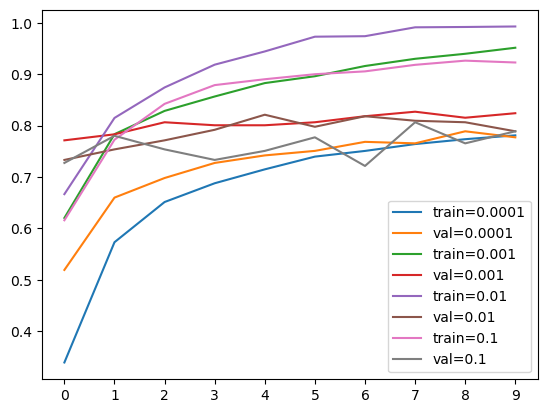

In [34]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
 
plt.xticks(np.arange(10))
plt.legend()

In [35]:
learning_rate = 0.001

In [37]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [38]:
learning_rate = 0.001
 
model = make_model(learning_rate=learning_rate)
 
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - accuracy: 0.5211 - loss: 1.4240 - val_accuracy: 0.7625 - val_loss: 0.7485
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7865 - loss: 0.6576 - val_accuracy: 0.7889 - val_loss: 0.6571
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8370 - loss: 0.5097 - val_accuracy: 0.8123 - val_loss: 0.5856
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8696 - loss: 0.4134 - val_accuracy: 0.8152 - val_loss: 0.5865
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8875 - loss: 0.3725 - val_accuracy: 0.8240 - val_loss: 0.5554
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9180 - loss: 0.3131 - val_accuracy: 0.8211 - val_loss: 0.5439
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9258 - loss: 0.2822 - val_accuracy: 0.7947 - val_loss: 0.5770
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9381 - loss: 0.2587 - val_accuracy: 0.8211 -

In [39]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
     
    outputs = keras.layers.Dense(10)(inner)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

In [40]:
learning_rate = 0.001
 
scores = {}
 
for size in [10, 100, 1000]:
    print(size)
 
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
 
    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.4520 - loss: 1.6902 - val_accuracy: 0.7038 - val_loss: 0.9352
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7113 - loss: 0.8644 - val_accuracy: 0.7507 - val_loss: 0.7826
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7860 - loss: 0.6770 - val_accuracy: 0.7654 - val_loss: 0.7522
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8092 - loss: 0.5976 - val_accuracy: 0.7801 - val_loss: 0.6883
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8431 - loss: 0.5024 - val_accuracy: 0.7713 - val_loss: 0.6936
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8575 - loss: 0.4619 - val_accuracy: 0.8035 - val_loss: 0.6519
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8886 - loss: 0.3869 - val_accuracy: 0.7977 - val_loss: 0.6364
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8888 - loss: 0.3688 - val_accuracy: 0.803

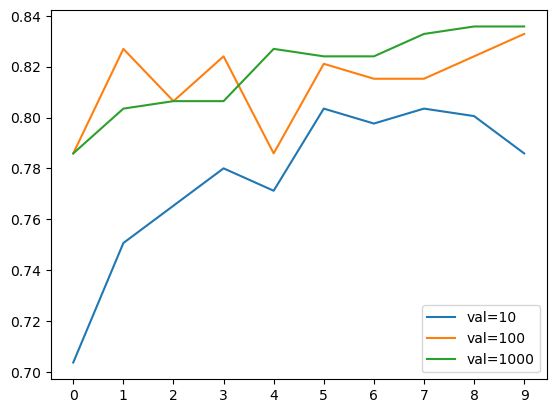

In [41]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
 
plt.xticks(np.arange(10))
plt.legend()

In [42]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
     
    outputs = keras.layers.Dense(10)(drop)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

In [43]:
learning_rate = 0.001
size = 100
 
scores = {}
 
for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
 
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
 
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
 
    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.5674 - loss: 1.2937 - val_accuracy: 0.7595 - val_loss: 0.7212
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8170 - loss: 0.5273 - val_accuracy: 0.8035 - val_loss: 0.5894
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9010 - loss: 0.3355 - val_accuracy: 0.7977 - val_loss: 0.6054
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9259 - loss: 0.2439 - val_accuracy: 0.8035 - val_loss: 0.5693
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9522 - loss: 0.1685 - val_accuracy: 0.8065 - val_loss: 0.5749
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9751 - loss: 0.1247 - val_accuracy: 0.8182 - val_loss: 0.5994
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9855 - loss: 0.0878 - val_accuracy: 0.8065 - val_loss: 0.6157
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9940 - loss: 0.0581 - val_accuracy: 0.79

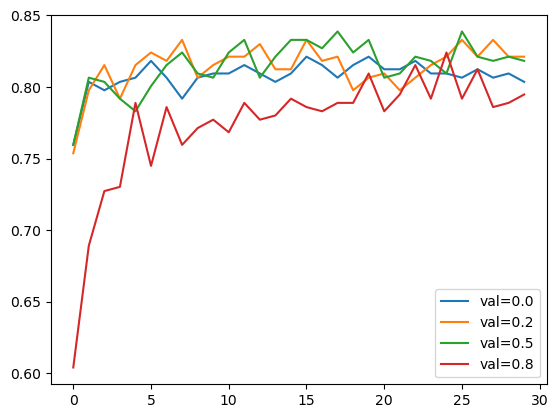

In [44]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
 
plt.legend()

In [ ]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=30,
#     width_shift_range=10,
#     height_shift_range=10,
#     shear_range=10,
#     zoom_range=0.1,
#     cval=0.0,
#     horizontal_flip=False,
#     vertical_flip=True,
# )

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)
 
train_ds = train_gen.flow_from_directory(
    './clothing-dataset/train',
    target_size=(150, 150),
    batch_size=32
)
 
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = val_gen.flow_from_directory(
    './clothing-dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [47]:
learning_rate = 0.001
size = 100
droprate = 0.2
 
model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
 
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.4760 - loss: 1.5773

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 239ms/step - accuracy: 0.4770 - loss: 1.5744 - val_accuracy: 0.7654 - val_loss: 0.7319
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.6976 - loss: 0.8954 - val_accuracy: 0.7889 - val_loss: 0.6565
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.7264 - loss: 0.7935 - val_accuracy: 0.7683 - val_loss: 0.6769
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.7481 - loss: 0.7304 - val_accuracy: 0.7801 - val_loss: 0.6630
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.8020 - loss: 0.6047 - val_accuracy: 0.7771 - val_loss: 0.6322
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.8041 - loss: 0.5786 - val_accuracy: 0.8123 - val_loss: 0.5829
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.8188 - loss: 0.5244 - val_accuracy: 0.7889 - val_loss: 0.6126
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.8148 - loss: 0.5446 - val_accuracy: 0.803

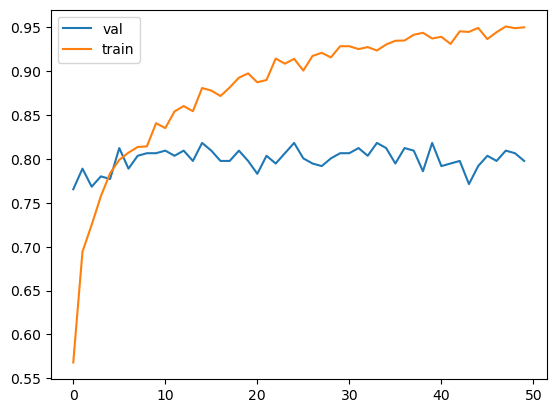

In [48]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
 
plt.legend()

In [51]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):
 
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
     
    outputs = keras.layers.Dense(10)(drop)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

In [52]:
input_size = 299

In [55]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
 
train_ds = train_gen.flow_from_directory(
    './clothing-dataset/train',
    target_size=(input_size, input_size),
    batch_size=32
)
 
 
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = train_gen.flow_from_directory(
    './clothing-dataset/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [57]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [59]:
learning_rate = 0.0005
size = 100
droprate = 0.2
 
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
 
history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.5713 - loss: 1.3335

2024-12-09 17:14:37.301590: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 751ms/step - accuracy: 0.5727 - loss: 1.3295 - val_accuracy: 0.8299 - val_loss: 0.5336
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 618ms/step - accuracy: 0.8145 - loss: 0.5541 - val_accuracy: 0.8387 - val_loss: 0.4442
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 618ms/step - accuracy: 0.8557 - loss: 0.4265 - val_accuracy: 0.8798 - val_loss: 0.4068
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 621ms/step - accuracy: 0.8632 - loss: 0.3969 - val_accuracy: 0.8710 - val_loss: 0.4277
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.8839 - loss: 0.3523 - val_accuracy: 0.8768 - val_loss: 0.3946
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 613ms/step - accuracy: 0.9047 - loss: 0.3113 - val_accuracy: 0.8563 - val_loss: 0.3980
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 619ms/step - accuracy: 0.8978 - loss: 0.3007 - val_accuracy: 0.8739 - val_loss: 0.3737
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 619ms/step - accuracy: 0.9062 - loss: 0.2808 - val_accuracy: 0.868

In [60]:
import tensorflow as tf
from tensorflow import keras
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [62]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
test_ds = test_gen.flow_from_directory(
    './clothing-dataset/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [63]:
model = keras.models.load_model('xception_v4_1_10_0.891.keras')

In [64]:
model.evaluate(test_ds)

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8919 - loss: 0.2981

2024-12-09 18:06:00.832380: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 889ms/step - accuracy: 0.8961 - loss: 0.2885


[0.23587501049041748, 0.9193548560142517]

In [65]:
import numpy as np
 
path = 'clothing-dataset/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
 
img = load_img(path, target_size=(299, 299))
 
x = np.array(img)
X = np.array([x])
X.shape
 
# Output: (1, 299, 299, 3)
 
X = preprocess_input(X)
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [66]:
pred

array([[-2.2684662 , -4.7280455 , -0.75654733, -1.5168442 ,  8.475173  ,
        -1.1829051 , -3.7882435 ,  3.716471  , -2.6964922 , -2.5090399 ]],
      dtype=float32)

In [67]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]
 
dict(zip(classes, pred[0]))

{'dress': np.float32(-2.2684662),
 'hat': np.float32(-4.7280455),
 'longsleeve': np.float32(-0.75654733),
 'outwear': np.float32(-1.5168442),
 'pants': np.float32(8.475173),
 'shirt': np.float32(-1.1829051),
 'shoes': np.float32(-3.7882435),
 'shorts': np.float32(3.716471),
 'skirt': np.float32(-2.6964922),
 't-shirt': np.float32(-2.5090399)}